In [11]:
# Install TensorFlow 2.0 
!pip install tensorflow-gpu==2.0.0-alpha0

In [2]:
## Importing the Libraries
import os
import sys
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, MaxPooling2D
## Seeding 
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed

2.0.0-beta0


In [3]:
from tensorflow.keras.datasets import cifar10
import numpy as np
(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3)) 
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))

noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


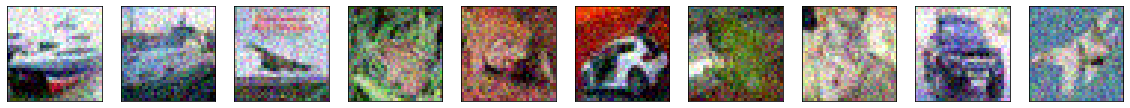

In [4]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(32,32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
input_img = Input(shape=(32, 32, 3)) 

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)

x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)

x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2, 2))(x)


x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        4624      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           1160  

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

W0711 13:38:36.468614 140320092493696 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 137s 3ms/sample - loss: 0.6393 - val_loss: 0.6679
Epoch 2/50
50000/50000 [==============================] - 131s 3ms/sample - loss: 0.6052 - val_loss: 0.6352
Epoch 3/50
50000/50000 [==============================] - 132s 3ms/sample - loss: 0.6004 - val_loss: 0.6339
Epoch 4/50
50000/50000 [==============================] - 133s 3ms/sample - loss: 0.5952 - val_loss: 0.6446
Epoch 5/50
50000/50000 [==============================] - 134s 3ms/sample - loss: 0.5921 - val_loss: 0.6171
Epoch 6/50
50000/50000 [==============================] - 135s 3ms/sample - loss: 0.5894 - val_loss: 0.6078
Epoch 7/50
50000/50000 [==============================] - 134s 3ms/sample - loss: 0.5879 - val_loss: 0.6264
Epoch 8/50
50000/50000 [==============================] - 134s 3ms/sample - loss: 0.5875 - val_loss: 0.6040
Epoch 9/50
50000/50000 [==============================] - 134s 3ms/sample - loss: 0.58

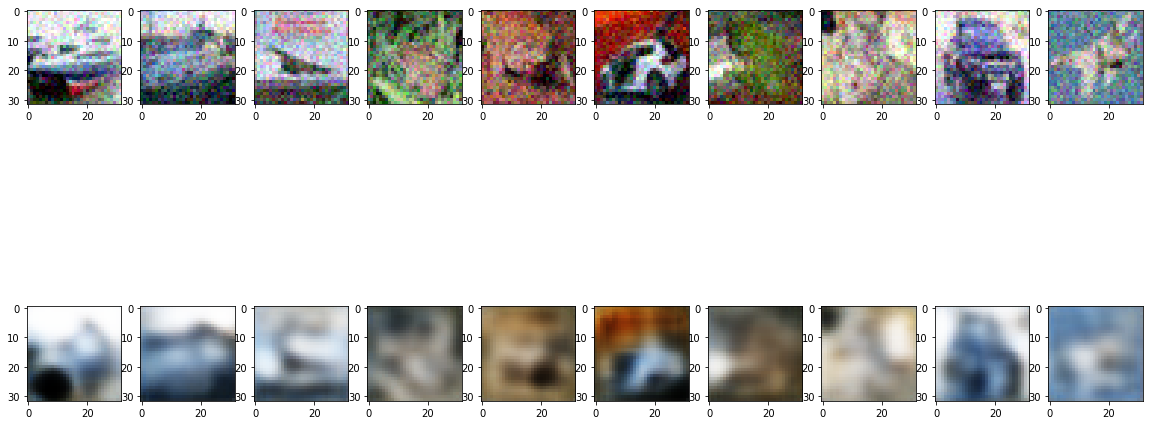

In [10]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 10))
for i in range(1, n+1):
  # display original
  ax = plt.subplot(2, n, i)
  plt.imshow(x_test_noisy[i].reshape(32, 32,3))

  # display reconstruction
  ax = plt.subplot(2, n, i + n)
  plt.imshow(decoded_imgs[i].reshape(32, 32,3))

plt.show()